# Análise Financeira com Python

### Objetivo:

Vamos dividir essa mentoria em 2 etapas:

Etapa 1 - Usar o Python para puxar dados da Web de cotação de qualquer ação e analisar o resultado de uma carteira

Etapa 2 - Puxar indicadores de empresas diferentes e fazer a comparação entre elas para escolhar "qual a melhor empresa"

### Disclamer Importante

Não sou analista, influencer, agente autônomo, sábio ou nada de finanças ou ações. Temos 1 objetivo aqui e apenas 1: aprender como usar o Python para fazer o que a gente quiser.

Então não se preocupe com "erros teóricos" ou ainda com o resultado de qualquer tipo de análise. O nosso objetivo aqui é treinar Python

### Parte 1 - Carteira de Investimentos

- Vamos pegar uma carteira teórica completa e calcular o rendimento dela ao longo de 2020 e comparar com os principais indicadores (CDI, IBOV, IPCA). No caso vamos usar o IBOV, mas o procedimento para os outros indicadores é semelhante

- Carteira: R$100.000, divididos da seguinte maneira em 01/01/2020:
- 30% Ações Brasileiras - Arquivo Carteira
- 10% SMAL11 - Arquivo Carteira
- 10% FII - Arquivo Carteira
- 50% Tesouro Selic

In [6]:
#importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

#importando a carteira
carteira = pd.read_excel('CarteiraMentoria.xlsx')
display(carteira)

,Ativos,Valor Investido,Tipo,Qtde,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,ITUB4,5000,Ação,134.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BBDC4,5000,Ação,134.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PETR4,5000,Ação,162.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,QUAL3,5000,Ação,128.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MGLU3,5000,Ação,416.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,SMAL11,10000,ETF,71.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,HSML11,5000,FII,40.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,BCRI11,5000,FII,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Tesouro Selic,50000,Renda Fixa,4.775239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, '')

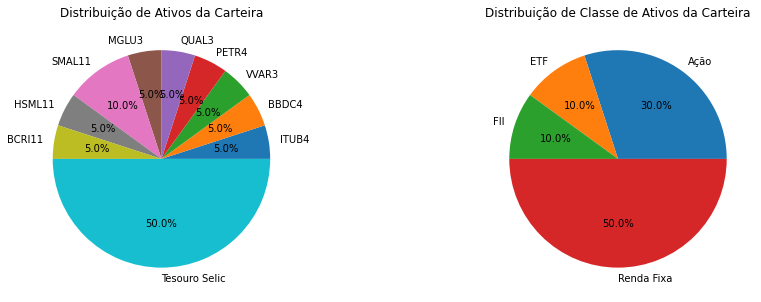

In [2]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
#vamos ver a distribuição da carteira por ativos
grafico1 = carteira.plot.pie(ax=ax1, labels=carteira['Ativos'], y='Valor Investido', legend=False, title='Distribuição de Ativos da Carteira', figsize=(15, 5), autopct="%.1f%%")
grafico1.set_ylabel('')
#vamos ver agora a distribuição da carteira por classe de ativo
#print(carteira.groupby('Tipo').sum())
grafico2 = carteira.groupby('Tipo').sum().plot.pie(ax=ax2, y='Valor Investido', legend=False, title='Distribuição de Classe de Ativos da Carteira', figsize=(15, 5), autopct="%.1f%%")
grafico2.set_ylabel('')

#### Pegando as Cotações ao Longo de 2020

- IBOV

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,118573.0,115649.0,115652.0,118573.0,5162700.0,118573.0
2020-01-03,118792.0,117341.0,118564.0,117707.0,6834500.0,117707.0
2020-01-06,117707.0,116269.0,117707.0,116878.0,6570000.0,116878.0
2020-01-07,117076.0,115965.0,116872.0,116662.0,4854100.0,116662.0
2020-01-08,117335.0,115693.0,116667.0,116247.0,5910500.0,116247.0
...,...,...,...,...,...,...
2020-12-04,113864.0,112294.0,112294.0,113682.0,8892900.0,113682.0
2020-12-07,114531.0,112629.0,113751.0,113625.0,9633900.0,113625.0
2020-12-08,114381.0,112820.0,113590.0,113571.0,8810900.0,113571.0


<AxesSubplot:xlabel='Date'>

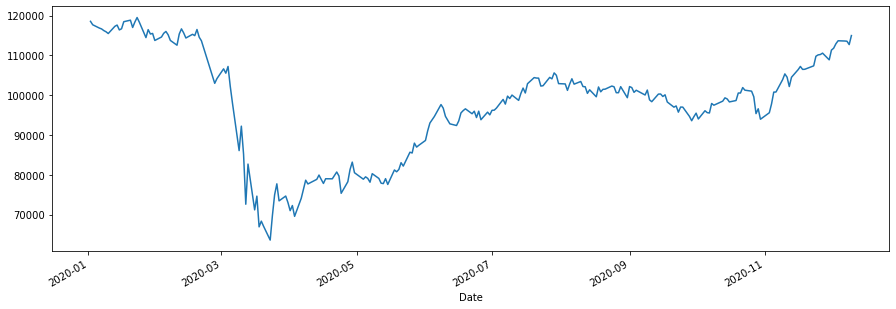

In [3]:
import pandas_datareader.data as web

#indices: ^BVSP
#ações brasileiras: TICKER.SA, PETR4.SA
#data_source = yahoo
#datas: '2020-12-10'
ibov_df = web.DataReader('^BVSP', data_source='yahoo', start='2020-01-01', end='2020-12-10')
display(ibov_df)
#print(ibov_df.info())
ibov_df['Adj Close'].plot(figsize=(15, 5))

- Da nossa carteira

In [7]:
carteira_df = pd.DataFrame()

for ativo in carteira['Ativos']:
    if 'Tesouro' not in ativo:
        carteira_df[ativo] = web.DataReader('{}.SA'.format(ativo), data_source='yahoo', start='2020-01-01', end='2020-12-10')['Adj Close']
carteira_df = carteira_df.ffill()
print(carteira_df.info())
display(carteira_df)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 235 entries, 2020-01-02 to 2020-12-10
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ITUB4   235 non-null    float64
 1   BBDC4   235 non-null    float64
 2   PETR4   235 non-null    float64
 3   QUAL3   235 non-null    float64
 4   MGLU3   235 non-null    float64
 5   SMAL11  235 non-null    float64
 6   HSML11  235 non-null    float64
 7   BCRI11  235 non-null    float64
dtypes: float64(8)
memory usage: 16.5 KB
None


,ITUB4,BBDC4,PETR4,QUAL3,MGLU3,SMAL11,HSML11,BCRI11
Date,,,,,,,,
2020-01-02,36.299717,32.216331,28.028816,36.022705,12.029737,139.500000,123.599998,126.190002
2020-01-03,35.917912,32.231155,27.800566,36.767056,11.922436,140.899994,123.500000,127.699997
2020-01-06,35.383392,31.655441,28.129242,38.274128,11.932189,139.100006,124.000000,126.699997
2020-01-07,34.562519,31.105509,28.019686,37.300041,11.898049,139.399994,124.699997,126.870003
2020-01-08,33.999363,30.624317,27.846214,36.583263,12.263844,138.199997,125.000000,124.570000
...,...,...,...,...,...,...,...,...
2020-12-04,29.555527,22.414841,25.136497,32.654663,23.618258,131.500000,94.120003,107.849998
2020-12-07,29.731339,22.562540,24.652576,32.294300,23.758007,132.070007,94.000000,107.330002
2020-12-08,29.653200,22.293211,24.342134,31.970890,24.905981,131.830002,94.330002,106.989998


- Do Tesouro Selic:

In [8]:
link = 'https://www.tesourotransparente.gov.br/ckan/dataset/df56aa42-484a-4a59-8184-7676580c81e3/resource/796d2059-14e9-44e3-80c9-2d9e30b405c1/download/PrecoTaxaTesouroDireto.csv'
tesouro_df = pd.read_csv(link, sep=';', decimal=',')
tesouro_df['Data Base'] = pd.to_datetime(tesouro_df['Data Base'], format='%d/%m/%Y')

tesouro_df = tesouro_df.loc[tesouro_df['Tipo Titulo']=='Tesouro Selic', :]
display(tesouro_df)

,Tipo Titulo,Data Vencimento,Data Base,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
3,Tesouro Selic,07/03/2017,2012-11-01,-0.01,0.03,5393.52,5384.20,5382.70
4,Tesouro Selic,07/03/2014,2012-11-01,-0.01,0.01,5391.91,5390.47,5388.97
13,Tesouro Selic,07/03/2013,2012-11-01,-0.01,0.00,5391.36,5391.19,5389.69
29,Tesouro Selic,07/03/2015,2013-01-04,-0.01,0.02,5454.76,5451.21,5449.69
44,Tesouro Selic,07/03/2015,2012-10-29,-0.01,0.02,5388.03,5384.24,5382.73
...,...,...,...,...,...,...,...,...
118443,Tesouro Selic,07/03/2015,2013-08-27,-0.02,0.00,5717.68,5715.94,5714.09
118448,Tesouro Selic,07/03/2017,2013-08-27,-0.03,0.01,5721.97,5713.93,5712.08
118449,Tesouro Selic,07/03/2014,2013-08-27,-0.02,-0.01,5716.54,5716.24,5714.39
118456,Tesouro Selic,07/03/2015,2013-08-28,-0.02,0.00,5719.51,5717.77,5715.92


- Juntar o tesouro selic na nossa carteira

In [9]:
tesouro_df = tesouro_df.rename(columns={'Data Base': 'Date'})
carteira_df = carteira_df.merge(tesouro_df[['Date', 'PU Base Manha']], on='Date', how='left')
display(carteira_df)

,Date,ITUB4,BBDC4,PETR4,QUAL3,MGLU3,SMAL11,HSML11,BCRI11,PU Base Manha
0,2020-01-02,36.299717,32.216331,28.028816,36.022705,12.029737,139.500000,123.599998,126.190002,10455.72
1,2020-01-02,36.299717,32.216331,28.028816,36.022705,12.029737,139.500000,123.599998,126.190002,10470.68
2,2020-01-02,36.299717,32.216331,28.028816,36.022705,12.029737,139.500000,123.599998,126.190002,10465.29
3,2020-01-03,35.917912,32.231155,27.800566,36.767056,11.922436,140.899994,123.500000,127.699997,10457.51
4,2020-01-03,35.917912,32.231155,27.800566,36.767056,11.922436,140.899994,123.500000,127.699997,10472.47
...,...,...,...,...,...,...,...,...,...,...
700,2020-12-09,29.829010,22.354025,24.597794,31.832293,23.937691,130.000000,93.849998,106.500000,10746.33
701,2020-12-09,29.829010,22.354025,24.597794,31.832293,23.937691,130.000000,93.849998,106.500000,10711.84
702,2020-12-10,30.815496,23.274944,25.401283,31.610527,23.358713,131.500000,92.989998,106.349998,10653.30
703,2020-12-10,30.815496,23.274944,25.401283,31.610527,23.358713,131.500000,92.989998,106.349998,10747.16


In [10]:
carteira_df = carteira_df.rename(columns={'PU Base Manha': 'Tesouro Selic'})
carteira_df = carteira_df.ffill()
display(carteira_df)

,Date,ITUB4,BBDC4,PETR4,QUAL3,MGLU3,SMAL11,HSML11,BCRI11,Tesouro Selic
0,2020-01-02,36.299717,32.216331,28.028816,36.022705,12.029737,139.500000,123.599998,126.190002,10455.72
1,2020-01-02,36.299717,32.216331,28.028816,36.022705,12.029737,139.500000,123.599998,126.190002,10470.68
2,2020-01-02,36.299717,32.216331,28.028816,36.022705,12.029737,139.500000,123.599998,126.190002,10465.29
3,2020-01-03,35.917912,32.231155,27.800566,36.767056,11.922436,140.899994,123.500000,127.699997,10457.51
4,2020-01-03,35.917912,32.231155,27.800566,36.767056,11.922436,140.899994,123.500000,127.699997,10472.47
...,...,...,...,...,...,...,...,...,...,...
700,2020-12-09,29.829010,22.354025,24.597794,31.832293,23.937691,130.000000,93.849998,106.500000,10746.33
701,2020-12-09,29.829010,22.354025,24.597794,31.832293,23.937691,130.000000,93.849998,106.500000,10711.84
702,2020-12-10,30.815496,23.274944,25.401283,31.610527,23.358713,131.500000,92.989998,106.349998,10653.30
703,2020-12-10,30.815496,23.274944,25.401283,31.610527,23.358713,131.500000,92.989998,106.349998,10747.16


- Calcular o valor investido

In [11]:
valor_investido = carteira_df.copy()

for ativo in carteira['Ativos']:
    #print(carteira.loc[carteira['Ativos']==ativo, 'Qtde'].values[0])
    valor_investido[ativo] = valor_investido[ativo] * carteira.loc[carteira['Ativos']==ativo, 'Qtde'].values[0]

valor_investido = valor_investido.set_index('Date')
valor_investido['Total'] = valor_investido.sum(axis=1)
display(valor_investido)

,ITUB4,BBDC4,PETR4,QUAL3,MGLU3,SMAL11,HSML11,BCRI11,Tesouro Selic,Total
Date,,,,,,,,,,
2020-01-02,4864.162071,4316.988419,4540.668228,4610.906250,5004.370392,9904.500000,4943.999939,4921.410095,49928.562424,93035.567818
2020-01-02,4864.162071,4316.988419,4540.668228,4610.906250,5004.370392,9904.500000,4943.999939,4921.410095,50000.000000,93107.005394
2020-01-02,4864.162071,4316.988419,4540.668228,4610.906250,5004.370392,9904.500000,4943.999939,4921.410095,49974.261462,93081.266856
2020-01-03,4813.000145,4318.974823,4503.691647,4706.183105,4959.733276,10003.899567,4940.000000,4980.299881,49937.110102,93162.892546
2020-01-03,4813.000145,4318.974823,4503.691647,4706.183105,4959.733276,10003.899567,4940.000000,4980.299881,50008.547678,93234.330122
...,...,...,...,...,...,...,...,...,...,...
2020-12-09,3997.087341,2995.439335,3984.842560,4074.533447,9958.079346,9230.000000,3753.999939,4153.500000,51316.294644,93463.776612
2020-12-09,3997.087341,2995.439335,3984.842560,4074.533447,9958.079346,9230.000000,3753.999939,4153.500000,51151.596649,93299.078617
2020-12-10,4129.276524,3118.842537,4115.007889,4046.147461,9717.224670,9336.500000,3719.599915,4147.649940,50872.054155,93202.303091


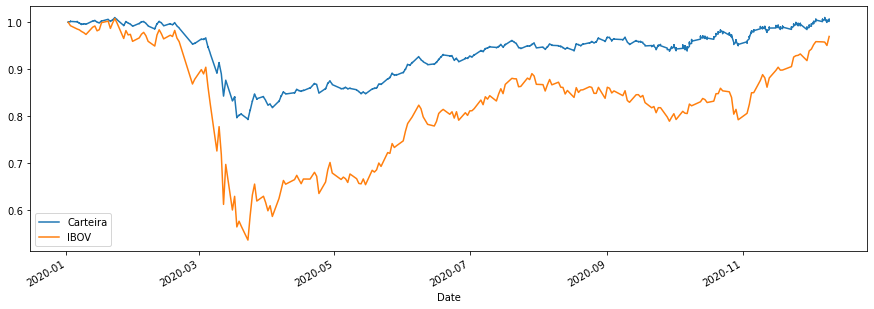

In [12]:
valor_investido_norm = valor_investido / valor_investido.iloc[0]
ibov_df_norm = ibov_df / ibov_df.iloc[0]

valor_investido_norm['Total'].plot(figsize=(15, 5), label='Carteira')
ibov_df_norm['Adj Close'].plot(label='IBOV')
plt.legend()

In [13]:
rentabilidade_carteira = valor_investido_norm['Total'].iloc[-1] - 1
rentabilidade_ibov = ibov_df_norm['Adj Close'].iloc[-1] - 1 
print('Rentabilidade da Carteira {:.1%}'.format(rentabilidade_carteira))
print('Rentabilidade do Ibovespa {:.1%}'.format(rentabilidade_ibov))

Rentabilidade da Carteira 0.5%
Rentabilidade do Ibovespa -3.0%


### Parte 2 - Comparativo entre Ativos

Créditos: https://simply-python.com/2019/01/16/retrieving-stock-statistics-from-yahoo-finance-using-python/

In [15]:
tgt_website = r'https://sg.finance.yahoo.com/quote/PETR4.SA/key-statistics?p=PETR4.SA'

h={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36'}

import requests



r = requests.get(tgt_website, headers=h)

def get_key_stats(tgt_website, ticker):

    df_list = pd.read_html(tgt_website)

    result_df = df_list[0]

    for df in df_list[1:]:

        result_df = result_df.append(df)

    result_df = result_df.rename(columns={1: ticker})

    return result_df.set_index(0).T

# print(r.text)

df_petr4 = get_key_stats(r.text, 'PETR4')

display(df_petr4)

,Market cap (intra-day) 5,Enterprise value 3,Trailing P/E,Forward P/E 1,PEG Ratio (5 yr expected) 1,Price/sales (ttm),Price/book (mrq),Enterprise value/revenue 3,Enterprise value/EBITDA 7,Beta (5Y monthly),...,Diluted EPS (ttm),Quarterly earnings growth (yoy),Total cash (mrq),Total cash per share (mrq),Total debt (mrq),Total debt/equity (mrq),Current ratio (mrq),Book value per share (mrq),Operating cash flow (ttm),Levered free cash flow (ttm)
PETR4,390.28B,684.03B,3.55,5.22,NaN,1.33,0.98,10.73,15.94,1.38,...,7.85,NaN,52.14B,4,318.57B,87.91,1.31,27.30,180.44B,107.67B


- Comparando as ações de:
    1. Magazine Luiza (MGLU3)
    2. Lojas Americanas (LAME4)
    3. Via Varejo (VVAR3)

In [18]:
tgt_website = r'https://sg.finance.yahoo.com/quote/PETR4.SA/key-statistics?p=PETR4.SA'
h={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36'}

import requests

acoes = ['MGLU3', 'LAME4', 'VVAR3']
r = requests.get(tgt_website, headers=h)

def get_key_stats(tgt_website, ticker):
    df_list = pd.read_html(tgt_website)
    result_df = df_list[0]
    for df in df_list[1:]:
        result_df = result_df.append(df)
    result_df = result_df.rename(columns={1: ticker})
    return result_df.set_index(0).T

# print(r.text)
estatiscas_empresas = pd.DataFrame()

for acao in acoes:
    link = f'https://sg.finance.yahoo.com/quote/{acao}.SA/key-statistics?p={acao}.SA'
#     df = get_key_stats(link, acao)
    df = get_key_stats(r.text, acao)
    estatiscas_empresas = estatiscas_empresas.append(df)
    
display(estatiscas_empresas)

,Market cap (intra-day) 5,Enterprise value 3,Trailing P/E,Forward P/E 1,PEG Ratio (5 yr expected) 1,Price/sales (ttm),Price/book (mrq),Enterprise value/revenue 3,Enterprise value/EBITDA 7,Beta (5Y monthly),...,Diluted EPS (ttm),Quarterly earnings growth (yoy),Total cash (mrq),Total cash per share (mrq),Total debt (mrq),Total debt/equity (mrq),Current ratio (mrq),Book value per share (mrq),Operating cash flow (ttm),Levered free cash flow (ttm)
MGLU3,390.28B,684.03B,3.55,5.22,NaN,1.33,0.98,10.73,15.94,1.38,...,7.85,NaN,52.14B,4,318.57B,87.91,1.31,27.30,180.44B,107.67B
LAME4,390.28B,684.03B,3.55,5.22,NaN,1.33,0.98,10.73,15.94,1.38,...,7.85,NaN,52.14B,4,318.57B,87.91,1.31,27.30,180.44B,107.67B
VVAR3,390.28B,684.03B,3.55,5.22,NaN,1.33,0.98,10.73,15.94,1.38,...,7.85,NaN,52.14B,4,318.57B,87.91,1.31,27.30,180.44B,107.67B


In [32]:
# print(list(estatiscas_empresas.columns))
estatiscas_empresas.info()

# estatiscas_empresas["Price/sales (ttm)"] = estatiscas_empresas.to_numeric(estatiscas_empresas[["Price/sales (ttm)"]])
# AttributeError: 'DataFrame' object has no attribute 'to_numeric'

# estatiscas_empresas.astype('int64')
# ValueError: invalid literal for int() with base 10: '390.28B'

estatiscas_empresas.astype({"Price/sales (ttm)":int})
ValueError: invalid literal for int() with base 10: '1.33'
        
estatiscas_empresas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, MGLU3 to VVAR3
Data columns (total 60 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Market cap (intra-day) 5          3 non-null      object
 1   Enterprise value 3                3 non-null      object
 2   Trailing P/E                      3 non-null      object
 3   Forward P/E 1                     3 non-null      object
 4   PEG Ratio (5 yr expected) 1       0 non-null      object
 5   Price/sales (ttm)                 3 non-null      object
 6   Price/book (mrq)                  3 non-null      object
 7   Enterprise value/revenue 3        3 non-null      object
 8   Enterprise value/EBITDA 7         3 non-null      object
 9   Beta (5Y monthly)                 3 non-null      object
 10  52-week change 3                  3 non-null      object
 11  S&P500 52-week change 3           3 non-null      object
 12  52-week high 3         

ValueError: invalid literal for int() with base 10: '1.33'

#### Price/sales (ttm)

In [20]:
import seaborn as sns

sns.barplot(x=estatiscas_empresas.index, y=estatiscas_empresas['Price/sales (ttm)'])

TypeError: Neither the `x` nor `y` variable appears to be numeric.

#### Enterprise value / EBITDA

In [33]:
# sns.barplot(x=estatiscas_empresas.index, y=estatiscas_empresas['Enterprise value/EBITDA 6'])
# 'Enterprise value/EBITDA 6''Enterprise value/EBITDA 6'

# sns.barplot(x=estatiscas_empresas.index, y=estatiscas_empresas['Enterprise value/EBITDA 7'])
# TypeError: Neither the `x` nor `y` variable appears to be numeric.



TypeError: Neither the `x` nor `y` variable appears to be numeric.